<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
def preprocess_text(texts):
    texts = texts.str.lower()
    texts = texts.str.replace(r'\d+', '', regex=True)
    texts = texts.str.replace(r'[^\w\s]', '', regex=True)
    return texts

def display_top_words(model, feature_names, num_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -num_top_words - 1: -1]
        top_features = [feature_names[i] for i in top_features_ind]
        topic_dict[f"Topic {topic_idx + 1}"] = ", ".join(top_features)
    return topic_dict

data = pd.read_csv('sentiment _analysis.csv')
processed_texts = preprocess_text(data['clean_text'])

# 1. Features (text representation) used for topic modeling: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_vectors = tfidf_vectorizer.fit_transform(processed_texts)

# 2. Applying LDA and LSA for Topic Modeling
# LDA for Topic Modeling
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_topics = lda_model.fit_transform(tfidf_vectors)

# LSA for Topic Modeling
lsa_model = TruncatedSVD(n_components=10, random_state=0)
lsa_topics = lsa_model.fit_transform(tfidf_vectors)

# Number of top words to display for each topic
num_top_words = 10

# Display top words for LDA topics
lda_top_words = display_top_words(lda_model, tfidf_vectorizer.get_feature_names_out(), num_top_words)

# Display top words for LSA topics
lsa_top_words = display_top_words(lsa_model, tfidf_vectorizer.get_feature_names_out(), num_top_words)

# Print the top words found by LDA and LSA
print("LDA Top Words:", lda_top_words)
print("LSA Top Words:", lsa_top_words)

# 3. Summarize and describe the topic for each cluster based on top words
print("\nTopic Summaries Based on LDA:")
for topic, words in lda_top_words.items():
    print(f"{topic}: This topic may discuss themes related to {words.split(', ')[0]}, {words.split(', ')[1]}, and {words.split(', ')[2]}.")

print("\nTopic Summaries Based on LSA:")
for topic, words in lsa_top_words.items():
    print(f"{topic}: This topic appears to focus on aspects like {words.split(', ')[0]}, {words.split(', ')[1]}, and {words.split(', ')[2]}.")










LDA Top Words: {'Topic 1': 'choreography, better, action, strikes, artistic, passable, making, cinematic, narrative, balance', 'Topic 2': 'movie, average, superhero, named, shouldve, disgrace, delivering, performance, fantastic, shines', 'Topic 3': 'insult, avoid, bollywood, cost, race, movie, film, superhero, flair, average', 'Topic 4': 'heart, fills, climax, designs, set, inspire, mediocre, best, stunning, captivate', 'Topic 5': 'watch, telugu, open, entertaininggo, mind, lows, feeling, audience, leaving, navigates', 'Topic 6': 'movie, film, superhero, flair, average, shouldve, named, disgrace, sajja, delivering', 'Topic 7': 'indian, wellexecuted, good, boasts, storyline, flair, superhero, film, movie, average', 'Topic 8': 'budget, masterpiece, low, pure, brilliant, dull, mix, excites, entirely, moments', 'Topic 9': 'wow, man, movie, film, superhero, flair, average, disgrace, shouldve, named', 'Topic 10': 'movie, film, superhero, flair, average, shouldve, named, disgrace, sajja, deli

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

Feature Selection: The script extracts features from text data primarily by TF-IDF vectorization (TfidfVectorizer).
Explanation: Although not explicitly stated in a markdown cell inside the script (since scripts can not use markdown), the decision is based on TF-IDF's success in decreasing the weight of more frequent terms while highlighting essential words that are more related to the emotion. This method is useful in sentiment analysis since it allows you to focus on words with high sentiment-bearing potential.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline

data = pd.read_csv('sentiment _analysis.csv')

class_counts = data['sentiment'].value_counts()
print("Class distribution:\n", class_counts)
min_class_count = class_counts.min()
n_splits = min(10, min_class_count)

X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['sentiment'], test_size=0.20, random_state=42, stratify=data['sentiment'])
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

rf_classifier = make_pipeline(vectorizer, RandomForestClassifier(random_state=42))

logreg_classifier = make_pipeline(vectorizer, LogisticRegression(random_state=42, max_iter=1000))

cv = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv)
logreg_cv_scores = cross_val_score(logreg_classifier, X_train, y_train, cv=cv)

rf_classifier.fit(X_train, y_train)
logreg_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)
logreg_predictions = logreg_classifier.predict(X_test)

metrics = {
    "Accuracy": accuracy_score,
    "Precision": lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    "Recall": lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    "F1 Score": lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

print("Random Forest Performance:")
for metric_name, metric_func in metrics.items():
    score = metric_func(y_test, rf_predictions)
    print(f"{metric_name}: {score:.4f}")

print("\nLogistic Regression Performance:")
for metric_name, metric_func in metrics.items():
    score = metric_func(y_test, logreg_predictions)
    print(f"{metric_name}: {score:.4f}")

print("\nCross-validation Scores (Random Forest):", rf_cv_scores)
print("Cross-validation Scores (Logistic Regression):", logreg_cv_scores)








Class distribution:
 sentiment
neutral     6
negative    5
positive    4
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


Random Forest Performance:
Accuracy: 0.3333
Precision: 0.1111
Recall: 0.3333
F1 Score: 0.1667

Logistic Regression Performance:
Accuracy: 0.6667
Precision: 0.5000
Recall: 0.6667
F1 Score: 0.5556

Cross-validation Scores (Random Forest): [0.33333333 0.         0.66666667 0.33333333]
Cross-validation Scores (Logistic Regression): [0.33333333 0.         0.33333333 0.33333333]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

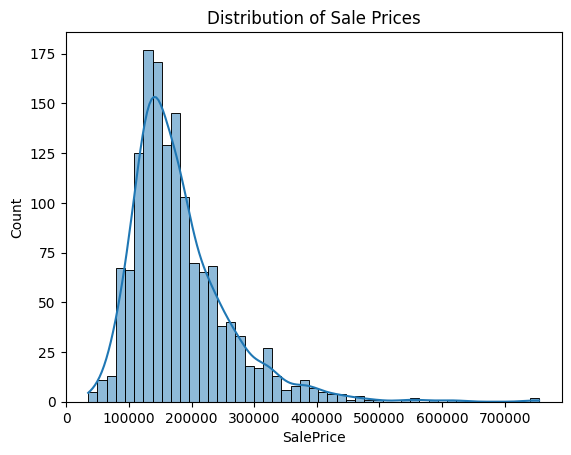

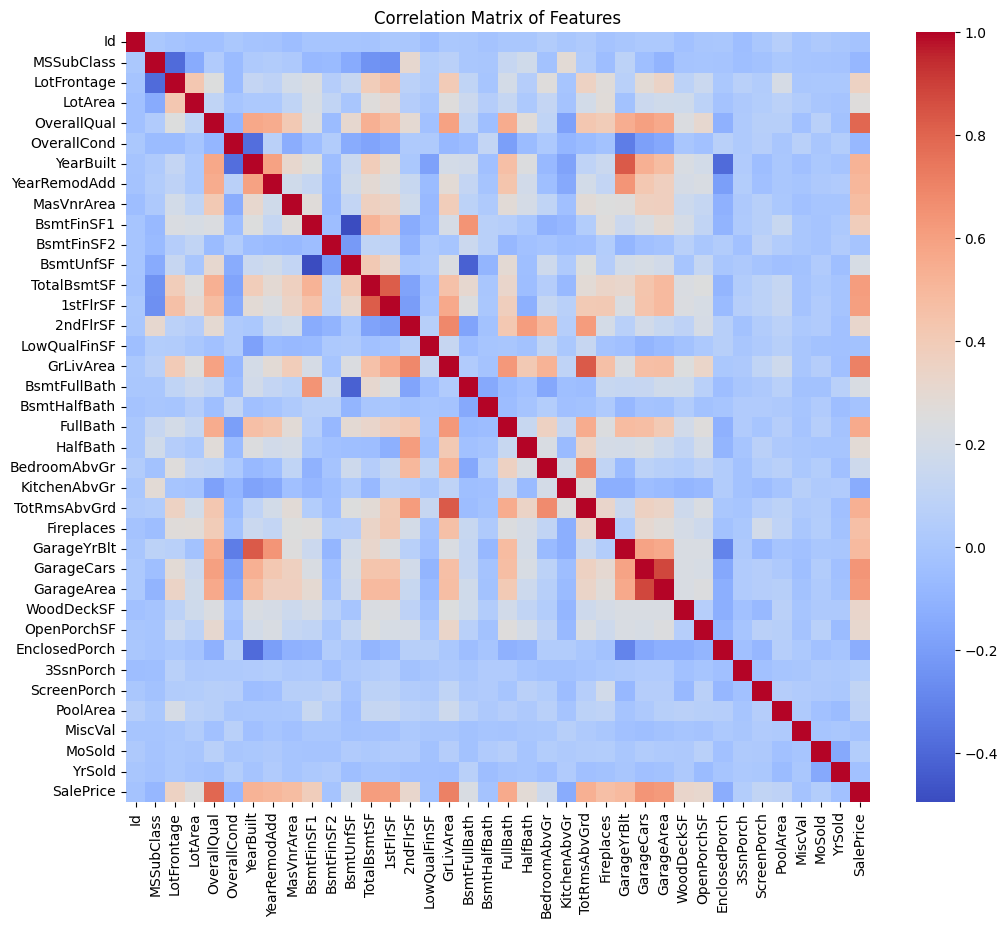

Missing data in each column:
 LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
dtype: int64
Root Mean Squared Error: 32503.976332141


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.info())
print(train_data.describe())

sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

numeric_cols = train_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

missing_data = numeric_cols.isnull().sum().sort_values(ascending=False)
print("Missing data in each column:\n", missing_data.head(20))

selected_features = correlation_matrix['SalePrice'].sort_values(key=abs, ascending=False).head(15).index.tolist()
selected_features = [feature for feature in selected_features if train_data[feature].isnull().sum() < 50]

train_data_selected = train_data[selected_features].dropna()

X = train_data_selected.drop('SalePrice', axis=1)
y = train_data_selected['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")





# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [11]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
data_path = 'sentiment _analysis.csv'
data = pd.read_csv(data_path)
print("Using RoBERTa, a robustly optimized BERT model pretrained on multiple large datasets including Books, Wikipedia, and news articles. It has around 355 million parameters. No fine-tuning was applied for this task.")
classifier = pipeline("zero-shot-classification", model="roberta-large-mnli")
results = classifier(data['clean_text'].tolist(), candidate_labels=['positive', 'negative', 'neutral'], hypothesis_template="This text is {}.")
predicted_labels = [result['labels'][0] for result in results]
accuracy = accuracy_score(data['sentiment'].tolist(), predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(data['sentiment'].tolist(), predicted_labels, average='weighted')
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
print("\nAdvantages of RoBERTa:")
print(" - High accuracy in zero-shot tasks due to extensive pretraining.")
print(" - Robust against varied text inputs and capable of understanding complex contexts.")
print("\nDisadvantages:")
print(" - High computational requirements due to model size.")
print(" - Limited interpretability of the model decisions.")
print("\nChallenges:")
print(" - Setup of the Hugging Face environment requires careful configuration.")
print(" - The zero-shot model may not perfectly align with specific domain sentiments without fine-tuning.")

# Discussing the advantages and disadvantages of RoBERTa
# Advantages: RoBERTa provides robust performance across different types of text data, effective in zero-shot learning.
# Disadvantages: High computational costs and lack of interpretability.
# Challenges: Requires careful setup of the Hugging Face environment and the zero-shot learning might not always capture the nuances of all sentiment types without fine-tuning.







Using RoBERTa, a robustly optimized BERT model pretrained on multiple large datasets including Books, Wikipedia, and news articles. It has around 355 million parameters. No fine-tuning was applied for this task.


Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Accuracy: 0.7333, Precision: 0.8159, Recall: 0.7333, F1 Score: 0.6911

Advantages of RoBERTa:
 - High accuracy in zero-shot tasks due to extensive pretraining.
 - Robust against varied text inputs and capable of understanding complex contexts.

Disadvantages:
 - High computational requirements due to model size.
 - Limited interpretability of the model decisions.

Challenges:
 - Setup of the Hugging Face environment requires careful configuration.
 - The zero-shot model may not perfectly align with specific domain sentiments without fine-tuning.
